In [1]:
import pandas as pd
import numpy as np
import yfinance as yf
import random
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
import secrets
import plotly as plotly
import plotly.express as px
from tqdm import tqdm
import plotly.graph_objects as go
pd.set_option('plotting.backend', 'matplotlib')
plotly.offline.init_notebook_mode()
#warnings.simplefilter(action='ignore', category=FutureWarning)


<h1>PORTFOLIO ONLY IWDA</h1>


In [2]:
TICKER="IWDA.AS"
NUMBER_OF_SIMULATIONS=1000
STARTING_CAPITAL = 10000
YEARS_OF_SIMULATION=30

In [3]:
YEARS_OF_SIMULATION=YEARS_OF_SIMULATION+1
Market_Days=253

df=yf.download(TICKER)["Adj Close"].pct_change(1).dropna()

[*********************100%%**********************]  1 of 1 completed


<Axes: xlabel='Date'>

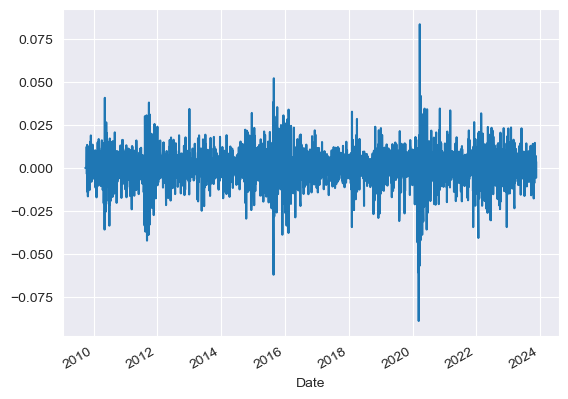

In [4]:
df.plot()

In [5]:
df

Date
2009-09-28    0.000000
2009-09-29    0.000000
2009-09-30    0.000000
2009-10-01    0.000000
2009-10-02    0.000000
                ...   
2023-11-13    0.007003
2023-11-14    0.006568
2023-11-15    0.003582
2023-11-16   -0.005737
2023-11-17    0.003590
Name: Adj Close, Length: 3624, dtype: float64

In [6]:
df_simulations=np.zeros((YEARS_OF_SIMULATION,NUMBER_OF_SIMULATIONS))
df_simulations[0,:]=STARTING_CAPITAL

for x in tqdm(range(0,NUMBER_OF_SIMULATIONS)):
    for i in range(1,YEARS_OF_SIMULATION):
        annual_change=1
        for k in range(Market_Days):
            annual_change=annual_change*(1+(secrets.choice(df.iloc[:])))
        df_simulations[i,x]=annual_change*df_simulations[i-1,x]
df_simulations= pd.DataFrame(df_simulations)
df_simulations_1=  pd.DataFrame(df_simulations)



  0%|          | 0/1000 [00:00<?, ?it/s]C:\Users\dadoi\anaconda3\Lib\random.py:374: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

100%|██████████| 1000/1000 [03:26<00:00,  4.84it/s]


In [7]:
df_simulations_1

0              1             2              3              4    \
0    10000.000000   10000.000000  1.000000e+04   10000.000000   10000.000000   
1    12291.727607   12214.525225  1.278133e+04   13208.127048   11608.668798   
2    11923.728711   14544.785899  1.601726e+04   13535.306157   16526.953342   
3    10540.844638   15936.398973  1.697462e+04   14285.178828   21373.712801   
4    12277.719561   15621.675743  2.359347e+04   16615.297825   21927.872474   
5    13104.829730   17301.483030  2.115218e+04   23388.887478   27508.807636   
6    17278.176744   20600.073537  2.844749e+04   22861.009608   36222.980608   
7    17745.027640   24292.242374  3.033900e+04   19695.061457   37996.720147   
8    20054.347437   37891.135574  2.639724e+04   21650.270861   51257.148606   
9    22454.586905   50068.447984  2.764293e+04   21932.737086   65563.341081   
10   20485.585235   63517.454395  4.007276e+04   20518.781448   68310.240758   
11   23561.037138   70661.151275  6.057037e+04   25347.162072   66904.581666   
12   27996.052877   66529.832494  6.920226e+04   36026.416513   68655.739607   
13   33869.986849   58155.759849  8.047349e+04   39545.695219   89599.530609   
14   31429.577861   52553.980148  9.325021e+04   53326.959423   93034.511718   
15   36199.941163   66562.879970  9.936613e+04   56856.877044   99151.443085   
16   39714.767369   72678.882714  1.255041e+05   96208.306839  127677.024983   
17   43143.803848   73649.957179  1.536991e+05  132030.003585  114262.320500   
18   45572.708483   79027.825789  1.693313e+05  146009.623396  134637.743440   
19   57021.745027   76855.768873  1.737574e+05  176166.318421  119770.461785   
20   74041.360380   75994.118160  2.055682e+05  194216.325803  137734.309047   
21  113735.910128   73675.855924  2.408657e+05  184870.216875  156748.262802   
22  122911.165066   81701.243246  2.436387e+05  259489.219083  173001.144926   
23  163352.924433   86927.459889  2.787442e+05  321733.453383  176331.211858   
24  181730.702928  108762.813174  3.690565e+05  338958.011021  216709.676930   
25  238915.823303  136604.364904  4.007242e+05  341457.202863  200912.419276   
26  276680.709271  162415.414418  5.227342e+05  443110.669391  282191.158765   
27  253443.148337  149178.710195  6.890507e+05  606463.292436  276338.943400   
28  301008.756690  156323.934744  8.173452e+05  734506.387228  284793.309739   
29  346236.371893  192905.767832  9.003718e+05  693092.947178  187807.081536   
30  330673.433622  265005.935740  1.093682e+06  589238.682635  243984.442343   

              5              6             7              8             9    \
0    10000.000000   10000.000000  10000.000000   10000.000000  10000.000000   
1    12009.841751   12044.740148  13684.904820    9573.677419  10023.100430   
2    14540.510254   15152.884746  21990.420300   10844.865813   9447.448784   
3    18235.503628   10856.874254  20741.397921   11210.416210  12332.940932   
4    19048.433998   11456.121496  24948.858369   11391.760281  13329.177665   
5    19783.523097   10952.648464  27059.389304   16560.083370  12713.533807   
6    16219.500434   11760.921056  20993.041229   19569.047470  16797.991337   
7    13702.854291   14282.141643  21263.675605   20753.977414  20386.507948   
8    13276.949204   16415.692164  22343.940191   25820.958435  25422.976500   
9    13327.298152   14202.312042  34267.894829   24831.390410  29961.027635   
10   15677.222986   16666.887331  41963.896119   28199.231230  27052.508784   
11   18833.660748   15134.132670  45876.100068   25095.210797  34900.415739   
12   22238.113877   15837.678905  42940.386391   31671.706907  39210.758434   
13   19419.017034   19349.235727  40625.878688   26147.800811  39740.836671   
14   21900.182445   22662.892463  44345.118594   30666.602014  46178.257803   
15   31733.491489   24786.654275  42397.092768   35812.989309  52901.346965   
16   40111.557401   25054.519923  54875.196296   30186.058850  48551.100275   
17   44373.867549   19332.74860

In [8]:
df_simulations=df_simulations_1
df_simulations.iloc[YEARS_OF_SIMULATION-1]

0      3.306734e+05
1      2.650059e+05
2      1.093682e+06
3      5.892387e+05
4      2.439844e+05
           ...     
995    6.491475e+04
996    3.076465e+05
997    1.876181e+05
998    1.857521e+05
999    5.462792e+05
Name: 30, Length: 1000, dtype: float64

In [9]:
quantile=df_simulations.iloc[YEARS_OF_SIMULATION-1].quantile([0.1,0.9])
quantile=list(quantile)
print(quantile)
df_simulations_purged=df_simulations[df_simulations.columns[ df_simulations.max() < quantile[1]]]
df_simulations_purged=df_simulations_purged[df_simulations_purged.columns[ df_simulations_purged.max() > quantile[0]]]


[79840.54028349565, 736708.9153939328]


<Axes: title={'center': 'Simulation of 1000 portfolios'}>

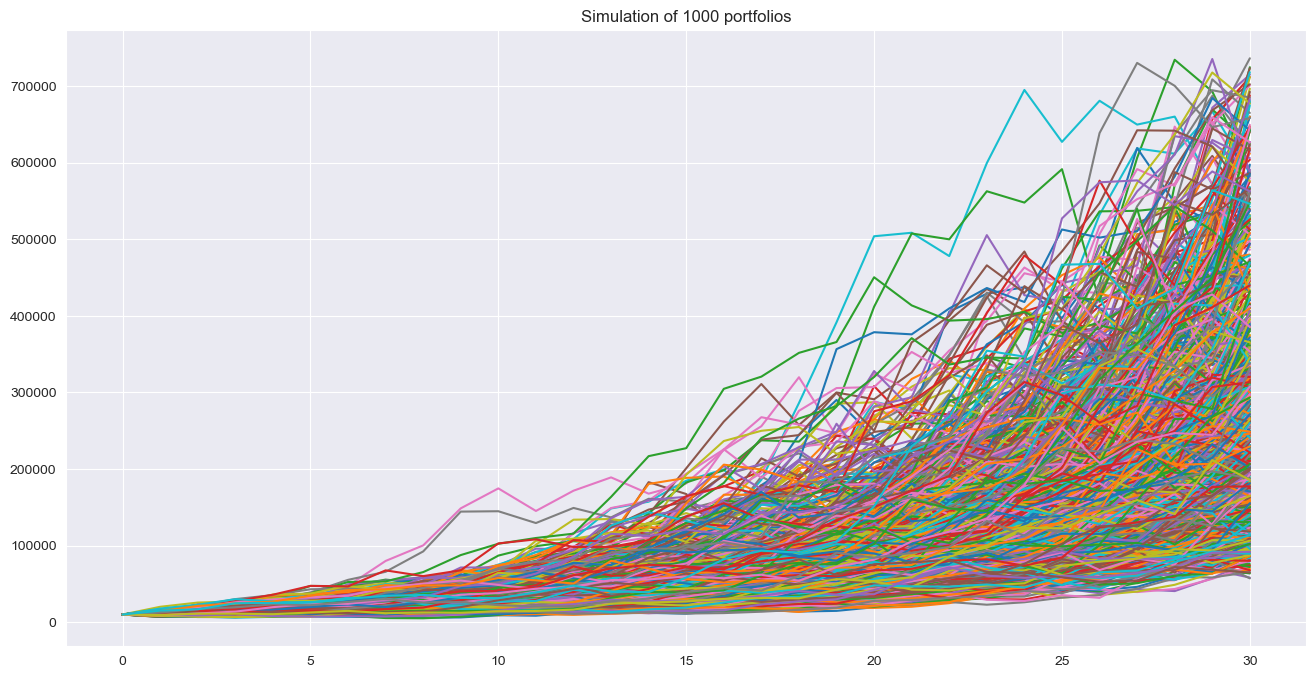

In [10]:
df_simulations_purged.plot(figsize=(16,8), title=f"Simulation of {NUMBER_OF_SIMULATIONS} portfolios", legend=False)


<Axes: ylabel='Density'>

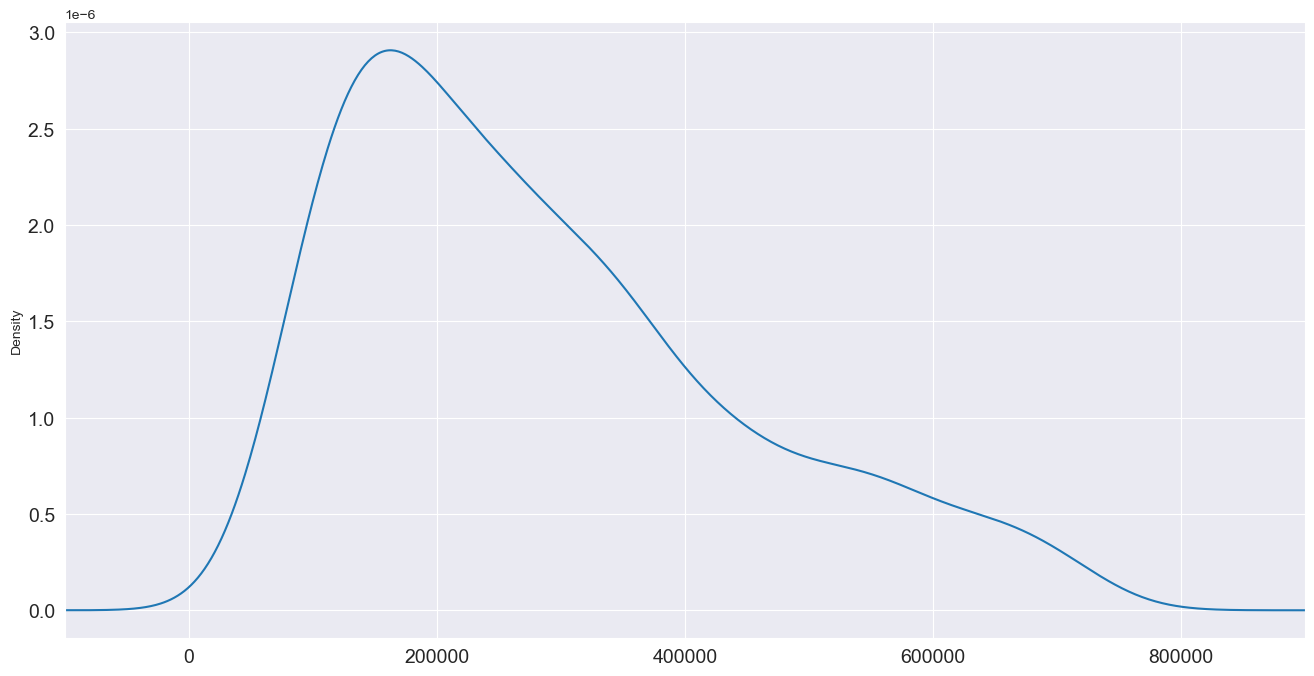

In [11]:
df_simulations_purged.iloc[YEARS_OF_SIMULATION-1].plot.density(figsize=(16,8),fontsize=14, xlim=(-100000,900000))

In [12]:
top_25 =[]
low_25 =[]
median=[]
for i in range(0,YEARS_OF_SIMULATION):
    top_25.append(df_simulations.iloc[i].quantile(0.75))
    low_25.append(df_simulations.iloc[i].quantile(0.25))
    median.append(df_simulations.iloc[i].median())
columns=["top 25%","median","bottom 25%"]
df_statistics=pd.DataFrame(list(zip(top_25,median,low_25)),columns=columns)
df_statistics
    
    





top 25%         median     bottom 25%
0    10000.000000   10000.000000   10000.000000
1    12439.485581   11195.612514   10083.694296
2    14549.432102   12447.245846   10721.555925
3    16756.882911   13911.521619   11481.952852
4    19226.148163   15498.929364   12484.246624
5    22046.766315   17108.814155   13471.261179
6    24993.021607   19114.702675   14749.589596
7    28649.832523   20972.396006   16471.453162
8    32647.877018   23369.198850   17957.982543
9    37448.050881   26244.752518   19387.059764
10   41220.262945   29837.698726   21384.554649
11   46284.673386   33555.811031   23012.372208
12   52454.182974   37862.161089   25504.477309
13   58853.739013   41946.980458   28480.422407
14   67354.390735   46432.106092   31495.625850
15   75143.331577   52230.551077   34632.178706
16   85504.004653   58127.387745   37125.472918
17   95878.440156   62529.391224   41702.685206
18  108539.837916   70417.046139   45828.091156
19  122040.338189   78373.911453   50036.854818
20  137876.382674   86071.378437   54801.294246
21  159741.627045   96259.217765   61755.730972
22  180275.782785  105039.591259   67767.046070
23  200313.367401  119090.242603   72160.062974
24  225474.080570  133415.125629   79060.726389
25  254955.127394  149604.695462   90335.472446
26  290530.851508  164864.900457   96955.211882
27  322165.900891  187843.859087  104826.703104
28  364663.751616  205994.653825  115597.081842
29  396220.216182  229215.346106  128508.130793
30  440207.725910  257919.888740  143043.150396

In [13]:
#ax= df_statistics.plot(legend=None,logy=False,fontsize=20,figsize=(25,15),linewidth=4,color="black",title=f"Simulation of {NUMBER_OF_SIMULATIONS} portfolios")
pd.set_option('plotting.backend', 'plotly')

fig = df_statistics.plot(width=1600, height=800,title=f"Simulation of {NUMBER_OF_SIMULATIONS} portfolios",labels= {"index": "Years to Maturity", "value":"Total Capital"} )
fig.add_trace(go.Scatter(x=list(range(0,YEARS_OF_SIMULATION)),y=np.array(top_25),fill='tonexty',mode='lines', line_color='blue' , fillcolor ="red", showlegend=False, hoverinfo="skip"))
fig.add_trace(go.Scatter(x=list(range(0,YEARS_OF_SIMULATION)),y=np.array(median),fill='tonexty',mode='lines', line_color='orange', fillcolor="green", showlegend=False, hoverinfo="skip"))


In [14]:
ls_simulations_at_profit=[]
for i in range(YEARS_OF_SIMULATION):
    c=len([1 for i in list(df_simulations.iloc[i])if i > STARTING_CAPITAL])
    ls_simulations_at_profit.append(c/NUMBER_OF_SIMULATIONS*100)
pd.set_option('plotting.backend', 'plotly')
df_simulations_at_profit = pd.DataFrame(ls_simulations_at_profit,columns=["Profit %"])
df_simulations_at_profit.plot(title="Minimum investment horizon", labels= {"index": "Period length in years", "value":"Chance to be in profit"})
    
    
    

In [15]:
TICKER="^GSPC"


In [ ]:
df=yf.download(TICKER)["Adj Close"].pct_change(1).dropna()
df_simulations = np.zeros((YEARS_OF_SIMULATION, NUMBER_OF_SIMULATIONS))
df_simulations[0, :] = STARTING_CAPITAL

for x in tqdm(range(0, NUMBER_OF_SIMULATIONS)):
    for i in range(1, YEARS_OF_SIMULATION):
        annual_change = 1
        for k in range(Market_Days):
            annual_change = annual_change * (1 + (secrets.choice(df.iloc[:])))
        df_simulations[i, x] = annual_change * df_simulations[i - 1, x]
df_simulations = pd.DataFrame(df_simulations)
df_simulations_1 = pd.DataFrame(df_simulations)
df_simulations = df_simulations_1
df_simulations.iloc[YEARS_OF_SIMULATION - 1]
quantile = df_simulations.iloc[YEARS_OF_SIMULATION - 1].quantile([0.1, 0.9])
quantile = list(quantile)
df_simulations_purged = df_simulations[df_simulations.columns[df_simulations.max() < quantile[1]]]
df_simulations_purged = df_simulations_purged[df_simulations_purged.columns[df_simulations_purged.max() > quantile[0]]]
top_25 =[]
low_25 =[]
median=[]
for i in range(0,YEARS_OF_SIMULATION):
    top_25.append(df_simulations.iloc[i].quantile(0.75))
    low_25.append(df_simulations.iloc[i].quantile(0.25))
    median.append(df_simulations.iloc[i].median())
columns=["top 25%","median","bottom 25%"]
df_statistics=pd.DataFrame(list(zip(top_25,median,low_25)),columns=columns)
pd.set_option('plotting.backend', 'plotly')

fig = df_statistics.plot(width=1600, height=800,title=f"Simulation of {NUMBER_OF_SIMULATIONS} portfolios",labels= {"index": "Years to Maturity", "value":"Total Capital"} )
fig.add_trace(go.Scatter(x=list(range(0,YEARS_OF_SIMULATION)),y=np.array(top_25),fill='tonexty',mode='lines', line_color='blue' , fillcolor ="red", showlegend=False, hoverinfo="skip"))
fig.add_trace(go.Scatter(x=list(range(0,YEARS_OF_SIMULATION)),y=np.array(median),fill='tonexty',mode='lines', line_color='orange', fillcolor="green", showlegend=False, hoverinfo="skip"))
    

[*********************100%%**********************]  1 of 1 completed


  0%|          | 0/1000 [00:00<?, ?it/s]C:\Users\dadoi\anaconda3\Lib\random.py:374: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

 82%|████████▏ | 820/1000 [02:50<00:37,  4.86it/s]

In [ ]:

ls_simulations_at_profit = []
for i in range(YEARS_OF_SIMULATION):
    c = len([1 for i in list(df_simulations.iloc[i]) if i > STARTING_CAPITAL])
    ls_simulations_at_profit.append(c / NUMBER_OF_SIMULATIONS * 100)

pd.set_option('plotting.backend', 'plotly')
df_simulations_at_profit = pd.DataFrame(ls_simulations_at_profit, columns=["Profit %"])
df_simulations_at_profit.plot(title="Minimum investment horizon",
                              labels={"index": "Period length in years", "value": "Chance to be in profit"})

In [ ]:
!jupyter nbconvert --execute --to html Portfolio1.ipynb --HTMLExporter.theme=dark